<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.930206,44.336492,59.046572,94.849705,-2.042182,303.120792,303.416045,-0.295253
1,0.0,1.0,60.876341,39.433734,24.417656,94.193049,-0.476109,228.444670,227.426352,1.018319
2,0.0,2.0,45.566953,97.241460,52.393561,80.331914,-15.858492,269.675396,286.541228,-16.865831
3,0.0,3.0,41.055663,47.511706,45.056075,85.216492,-0.811559,228.028377,230.133311,-2.104934
4,0.0,4.0,32.062710,69.550473,24.708911,52.183411,-5.548404,182.957101,188.937273,-5.980172
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.047671,91.857713,93.720479,32.946123,-1.093393,252.478593,252.663665,-0.185072
59996,999.0,56.0,95.712162,57.697531,95.679415,53.190400,6.609466,318.888974,321.593717,-2.704743
59997,999.0,57.0,25.601042,52.986224,59.321987,59.112512,-4.905468,202.116296,204.859793,-2.743497
59998,999.0,58.0,74.655973,65.040250,72.700784,57.902426,15.128221,295.427654,282.966047,12.461607


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.930206,44.336492,59.046572,94.849705,-2.042182,303.120792,303.416045,-0.295253
1,0.0,1.0,60.876341,39.433734,24.417656,94.193049,-0.476109,228.444670,227.426352,1.018319
2,0.0,2.0,45.566953,97.241460,52.393561,80.331914,-15.858492,269.675396,286.541228,-16.865831
3,0.0,3.0,41.055663,47.511706,45.056075,85.216492,-0.811559,228.028377,230.133311,-2.104934
4,0.0,4.0,32.062710,69.550473,24.708911,52.183411,-5.548404,182.957101,188.937273,-5.980172
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.047671,91.857713,93.720479,32.946123,-1.093393,252.478593,252.663665,-0.185072
59996,999.0,56.0,95.712162,57.697531,95.679415,53.190400,6.609466,318.888974,321.593717,-2.704743
59997,999.0,57.0,25.601042,52.986224,59.321987,59.112512,-4.905468,202.116296,204.859793,-2.743497
59998,999.0,58.0,74.655973,65.040250,72.700784,57.902426,15.128221,295.427654,282.966047,12.461607


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.930206  44.336492  59.046572  94.849705  -2.042182   
      1.0    60.876341  39.433734  24.417656  94.193049  -0.476109   
      2.0    45.566953  97.241460  52.393561  80.331914 -15.858492   
      3.0    41.055663  47.511706  45.056075  85.216492  -0.811559   
      4.0    32.062710  69.550473  24.708911  52.183411  -5.548404   
...                ...        ...        ...        ...        ...   
999.0 55.0   25.047671  91.857713  93.720479  32.946123  -1.093393   
      56.0   95.712162  57.697531  95.679415  53.190400   6.609466   
      57.0   25.601042  52.986224  59.321987  59.112512  -4.905468   
      58.0   74.655973  65.040250  72.700784  57.902426  15.128221   
      59.0   88.160340  94.018430  43.838592  67.932954 -14.012076   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    303.120792  303.416045  -0.295253  
      1.0    228.444670  227.426352   1.018319  
      2.0    269.675396  286.541228 -16.865831  
      3.0    228.028377  230.133311  -2.104934  
      4.0    182.957101  188.937273  -5.980172  
...                 ...         ...        ...  
999.0 55.0   252.478593  252.663665  -0.185072  
      56.0   318.888974  321.593717  -2.704743  
      57.0   202.116296  204.859793  -2.743497  
      58.0   295.427654  282.966047  12.461607  
      59.0   289.938240  299.018619  -9.080379  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.930206  44.336492  59.046572  94.849705  -2.042182   
      1.0    60.876341  39.433734  24.417656  94.193049  -0.476109   
      2.0    45.566953  97.241460  52.393561  80.331914 -15.858492   
      3.0    41.055663  47.511706  45.056075  85.216492  -0.811559   
      4.0    32.062710  69.550473  24.708911  52.183411  -5.548404   
...                ...        ...        ...        ...        ...   
999.0 55.0   25.047671  91.857713  93.720479  32.946123  -1.093393   
      56.0   95.712162  57.697531  95.679415  53.190400   6.609466   
      57.0   25.601042  52.986224  59.321987  59.112512  -4.905468   
      58.0   74.655973  65.040250  72.700784  57.902426  15.128221   
      59.0   88.160340  94.018430  43.838592  67.932954 -14.012076   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    303.120792  303.416045  -0.295253  
      1.0    228.444670  227.426352   1.018319  
      2.0    269.675396  286.541228 -16.865831  
      3.0    228.028377  230.133311  -2.104934  
      4.0    182.957101  188.937273  -5.980172  
...                 ...         ...        ...  
999.0 55.0   252.478593  252.663665  -0.185072  
      56.0   318.888974  321.593717  -2.704743  
      57.0   202.116296  204.859793  -2.743497  
      58.0   295.427654  282.966047  12.461607  
      59.0   289.938240  299.018619  -9.080379  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.930206,44.336492,59.046572,94.849705,-2.042182,303.120792,303.416045,-0.295253
1,0.0,1.0,60.876341,39.433734,24.417656,94.193049,-0.476109,228.444670,227.426352,1.018319
2,0.0,2.0,45.566953,97.241460,52.393561,80.331914,-15.858492,269.675396,286.541228,-16.865831
3,0.0,3.0,41.055663,47.511706,45.056075,85.216492,-0.811559,228.028377,230.133311,-2.104934
4,0.0,4.0,32.062710,69.550473,24.708911,52.183411,-5.548404,182.957101,188.937273,-5.980172
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.047671,91.857713,93.720479,32.946123,-1.093393,252.478593,252.663665,-0.185072
59996,999.0,56.0,95.712162,57.697531,95.679415,53.190400,6.609466,318.888974,321.593717,-2.704743
59997,999.0,57.0,25.601042,52.986224,59.321987,59.112512,-4.905468,202.116296,204.859793,-2.743497
59998,999.0,58.0,74.655973,65.040250,72.700784,57.902426,15.128221,295.427654,282.966047,12.461607


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.930206  44.336492  59.046572  94.849705  -2.042182   
      1.0    60.876341  39.433734  24.417656  94.193049  -0.476109   
      2.0    45.566953  97.241460  52.393561  80.331914 -15.858492   
      3.0    41.055663  47.511706  45.056075  85.216492  -0.811559   
      4.0    32.062710  69.550473  24.708911  52.183411  -5.548404   
...                ...        ...        ...        ...        ...   
999.0 55.0   25.047671  91.857713  93.720479  32.946123  -1.093393   
      56.0   95.712162  57.697531  95.679415  53.190400   6.609466   
      57.0   25.601042  52.986224  59.321987  59.112512  -4.905468   
      58.0   74.655973  65.040250  72.700784  57.902426  15.128221   
      59.0   88.160340  94.018430  43.838592  67.932954 -14.012076   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    303.120792  303.416045  -0.295253  
      1.0    228.444670  227.426352   1.018319  
      2.0    269.675396  286.541228 -16.865831  
      3.0    228.028377  230.133311  -2.104934  
      4.0    182.957101  188.937273  -5.980172  
...                 ...         ...        ...  
999.0 55.0   252.478593  252.663665  -0.185072  
      56.0   318.888974  321.593717  -2.704743  
      57.0   202.116296  204.859793  -2.743497  
      58.0   295.427654  282.966047  12.461607  
      59.0   289.938240  299.018619  -9.080379  

[60000 rows x 8 columns]

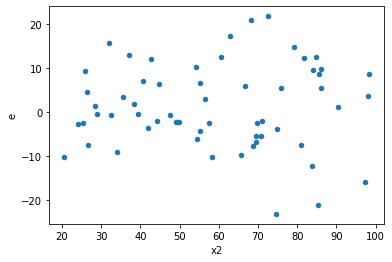

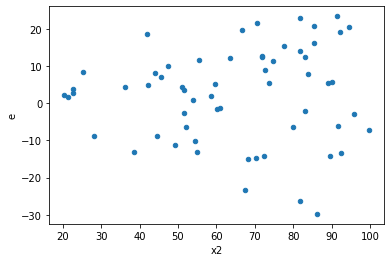

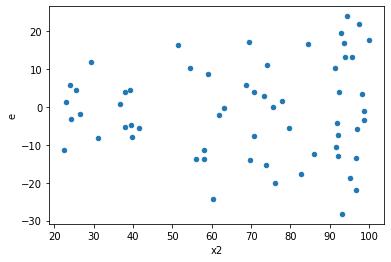

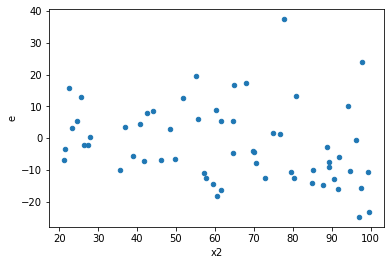

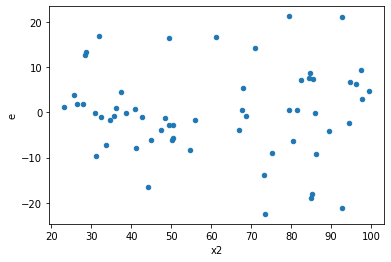

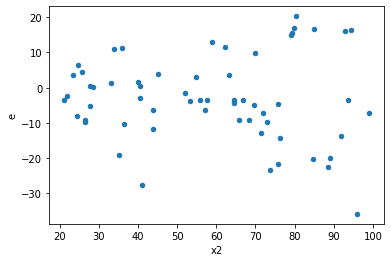

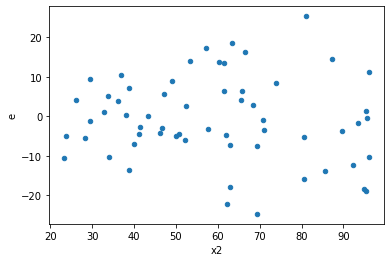

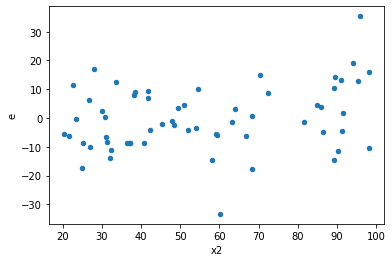

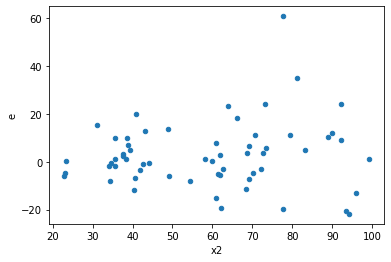

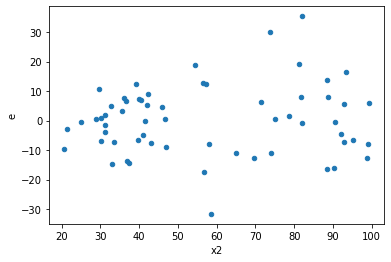

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,20.0,1856.4978953376124,2348.5886031360533,92.82489476688062,117.42943015680267,1.2650639728891004,0.6040163255737281,0.697991837213136,0.30200816278686404,Reject001=1 : Homoscedasticity
1.0,20.0,20.0,1974.3120260156727,3980.9039454746685,98.71560130078363,199.04519727373344,2.0163499452052,0.12517432236818493,0.9374128388159075,0.06258716118409247,Reject001=1 : Homoscedasticity
2.0,20.0,20.0,1406.8603990381234,2830.7302825060037,70.34301995190617,141.5365141253002,2.012090385400987,0.12629486360690545,0.9368525681965473,0.06314743180345272,Reject001=1 : Homoscedasticity
3.0,20.0,20.0,2335.6462913224823,3656.0525805359966,116.78231456612411,182.80262902679982,1.5653280182530882,0.32438376727492435,0.8378081163625378,0.16219188363746218,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,1467.0992236203836,2138.7664980367636,73.35496118101918,106.93832490183817,1.45781993719477,0.40654499001185984,0.7967275049940701,0.20327249500592992,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,1822.5693988087774,4601.488761092467,91.12846994043886,230.07443805462336,2.524726226666583,0.044352479964776315,0.9778237600176118,0.022176239982388157,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,1669.5058277749022,1674.4063974114347,83.4752913887451,83.72031987057173,1.0029353414375701,0.994835627842801,0.5025821860785995,0.4974178139214005,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,1304.1072818875277,2803.3470408388253,65.20536409437639,140.16735204194126,2.149629159942532,0.09486190471386413,0.9525690476430679,0.047430952356932066,Reject001=1 : Homoscedasticity
10.0,20.0,20.0,1815.6354917213564,3142.0290223557486,90.78177458606783,157.10145111778743,1.7305395475481002,0.22869063632362074,0.8856546818381896,0.11434531816181037,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,1856.4978953376124,2348.5886031360533,92.82489476688062,117.42943015680267,1.2650639728891004,0.6040163255737281,Reject001=1 : Homoscedasticity
1.0,20.0,20.0,1974.3120260156727,3980.9039454746685,98.71560130078363,199.04519727373344,2.0163499452052,0.12517432236818493,Reject001=1 : Homoscedasticity
2.0,20.0,20.0,1406.8603990381234,2830.7302825060037,70.34301995190617,141.5365141253002,2.012090385400987,0.12629486360690545,Reject001=1 : Homoscedasticity
3.0,20.0,20.0,2335.6462913224823,3656.0525805359966,116.78231456612411,182.80262902679982,1.5653280182530882,0.32438376727492435,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,1467.0992236203836,2138.7664980367636,73.35496118101918,106.93832490183817,1.45781993719477,0.40654499001185984,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,1822.5693988087774,4601.488761092467,91.12846994043886,230.07443805462336,2.524726226666583,0.044352479964776315,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,1669.5058277749022,1674.4063974114347,83.4752913887451,83.72031987057173,1.0029353414375701,0.994835627842801,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,1304.1072818875277,2803.3470408388253,65.20536409437639,140.16735204194126,2.149629159942532,0.09486190471386413,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,3762.596551518485,3598.8752133817566,188.12982757592425,179.94376066908782,0.956487139693291,0.921742655148649,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      928
Reject001=0 : Heteroscedasticity     72
Name: Result_test, dtype: int64